# Conexión a GPS Bluetooth

## Pol Riera González  -   Electrónica Aeroespacial   -  Master en Electrónica Industrial

### polriera@correo.ugr.es

### Video explicativo práctica

<a href="https://drive.google.com/file/d/1Ynx9ECFjqzS4iUSVUz9bXmjRQq61hBc3/view?usp=sharing
" target="_blank">Conexión GPS</a>

altitud 0.0
timestamp 00:00:00
datetime 1999-08-22 00:00:00
status V
latitude -0.0
longitude -0.0
lon_dir W
spd_over_grnd 0.0
mag_variation 
mag_var_dir 


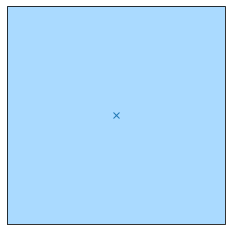

altitud 0.0
timestamp 00:00:00
datetime 1999-08-22 00:00:00
status V
latitude -0.0
longitude -0.0
lon_dir W
spd_over_grnd 0.0
mag_variation 
mag_var_dir 
altitud 0.0
timestamp 00:00:00
datetime 1999-08-22 00:00:00
status V
latitude -0.0
longitude -0.0
lon_dir W
spd_over_grnd 0.0
mag_variation 
mag_var_dir 
altitud 0.0
timestamp 00:00:00
datetime 1999-08-22 00:00:00
status V
latitude -0.0
longitude -0.0
lon_dir W
spd_over_grnd 0.0
mag_variation 
mag_var_dir 
altitud 0.0
timestamp 00:00:00
datetime 1999-08-22 00:00:00
status V
latitude -0.0
longitude -0.0
lon_dir W
spd_over_grnd 0.0
mag_variation 
mag_var_dir 
altitud 0.0
timestamp 00:00:00
datetime 1999-08-22 00:00:00
status V
latitude -0.0
longitude -0.0
lon_dir W
spd_over_grnd 0.0
mag_variation 
mag_var_dir 
altitud 0.0
timestamp 00:00:00
datetime 1999-08-22 00:00:00
status V
latitude -0.0
longitude -0.0
lon_dir W
spd_over_grnd 0.0
mag_variation 
mag_var_dir 
altitud 0.0
timestamp 00:00:00
datetime 1999-08-22 00:00:00
status V
latitud

In [18]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 06 18:57:59 2021

@author: Pol
"""

import serial
import pynmea2
import gps
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt
import keyboard


import time

file_gps = open("log.txt", 'w')

#usamos libreria Cartopy para pedir imagen a google
request = cimgt.GoogleTiles()
mapa = plt.figure()
pto = mapa.add_subplot(111, projection=request.crs)

with serial.Serial('COM8',38400) as gps:    
    while True:
        if keyboard.is_pressed('p'):
            print('se presionó [p]arar!')
            break       
        try:
            dato = gps.readline()
            
            trama = dato.decode('utf-8').replace('\n','')
            #print('trama', trama)
            

            try:
                if "GPGGA" in trama:
                    GPGGA = pynmea2.parse(trama)
                    altitud = GPGGA.altitude
                    print('altitud',altitud)
                
                if "RMC" in trama:
                    RMC = pynmea2.parse(trama)
                    
                    timestamp = RMC.timestamp
                    print('timestamp',timestamp)
                    datetime = RMC.datetime
                    print('datetime',datetime)
                    status = RMC.status                    
                    print('status',status)
                    latitude = RMC.latitude
                    print('latitude',latitude)
                    longitude = RMC.longitude
                    print('longitude',longitude)
                    lon_dir = RMC.lon_dir
                    print('lon_dir',lon_dir)
                    spd_over_grnd = RMC.spd_over_grnd
                    print('spd_over_grnd',spd_over_grnd)
                    mag_variation = RMC.mag_variation
                    print('mag_variation',mag_variation)
                    mag_var_dir = RMC.mag_var_dir             
                    print('mag_var_dir',mag_var_dir)
                    
                    #ponemos en la imagen las coordenadas que vienen del NNMEA RMC sobre la imagen de google
                    pto.set_extent([RMC.longitude + 0.01, RMC.longitude - 0.01, RMC.latitude + 0.01, RMC.latitude - 0.01])
                    pto.add_image(request, 14)
                    
                    pto.plot(RMC.longitude, RMC.latitude, 'x', transform=ccrs.Geodetic())
                    plt.pause(0.1)
                    
                if "GSV" in trama:
                    GSV = pynmea2.parse(trama)
                    
                    num_sv_in_view = GSV.num_sv_in_view
                    sv_prn_num_1 = GSV.sv_prn_num_1
                    print('num_sv_in_view',num_sv_in_view)
                    print('sv_prn_num_1',sv_prn_num_1) 
                    
                    
            except pynmea2.ParseError as e:
                print ('Parse error: {}'.format(e))
                pass
        #detenemos el programa cntrl + C en el teclado
        except KeyboardInterrupt:
            print('Programa interrumpido')
            break 